

# Project: Investigate a Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
TMDB movie data set is used to investigate and analyze data.It contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Using this Data set we can analyze below questions :

1.Profit Trends of movies over the years

2.Movies with Popular runtime over the time

3.Popularity Trend of movies

4.Budget,Revenue and profit distribution.
### Importing packages used for analysing and plotting data


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties
General Properties
Observations:

There are total 21 columns in the given data set. There are 10866 rows.

Null values are present in below columns:

imdb_id , cast , homepage , director , tagline , keywords , overview , genres , production_companies

For further analysing of data need to drop unused columns, drop duplicate rows and rows with null values for genres since it is used for answering some of the above questions.Calculate profit column and remove rows with 0 profit

Loading csv file and displaying information about data set

In [4]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning
In this section we're going to sift through data . Remove unused columns,Remove duplicate rows and remove rows with invalid values to make a cleaner data set for analysis.

Printing rows and columns in data set

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
print('Total rows and coulmns before data cleaning',df.shape)

Total rows and coulmns before data cleaning (10866, 21)


#### Deleting Unused columns

In [10]:
df.drop(['id','imdb_id','budget','revenue','cast','homepage','director','tagline','keywords','overview','production_companies','release_date','vote_count','vote_average'], axis=1, inplace=True)

#### Removing duplicate records

In [11]:
df.drop_duplicates(inplace=True)


#### Removing rows which has 'genres' value empty

In [12]:
df.dropna(subset=['genres'], inplace=True)


#### Replace data which has 0 with NaN and Removing rows which has NaN for value in any column/row

In [13]:
df=df.replace(0,np.NaN)
df=df.dropna()

#### converting popularity ,runtime , budget and revenue to int type

In [14]:
df[['popularity','runtime','budget_adj', 'revenue_adj']] = df[['popularity','runtime','budget_adj', 'revenue_adj']].applymap(np.int64)

#### calculating and Adding profit column using budget_adj and revenune_adj columns and providing index of newly added column. Assuming currency in US dollars(USD/$)

In [15]:

df.insert(7,'profit',df['revenue_adj']-df['budget_adj'])

#### Printing information about filtered data
#### save new clean dataset to a csv file

In [16]:
print('Total rows and coulmns after data cleaning',df.shape)
df.info()

Total rows and coulmns after data cleaning (3854, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
popularity        3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_year      3854 non-null int64
budget_adj        3854 non-null int64
revenue_adj       3854 non-null int64
profit            3854 non-null int64
dtypes: int64(6), object(2)
memory usage: 271.0+ KB


In [17]:
df.to_csv('clean_tmdb_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 Profit Trends of movies over the years
#### Observations:
Maximum profit was in the year 2015 and Minimum profit was in the year 1966. profits are increasing from year 1980

Writing a function definition to find trend. It takes 5 parameters as inputs, which are used to calculate graph by getting data from clean dataset csv file which was created in previous section.Parameters are column to be shown on x-axis,column to be shown on y-axis. This function will return Maximum and Minumum value for given y_axis over x_axis

In [19]:
def find_trend(column_x,column_y):
    #load clean data
    df = pd.read_csv('clean_tmdb_data.csv')
    #set graph size
    plt.figure(figsize=(5,3), dpi = 120)
    #plotting the graph
    plt.plot(df.groupby(column_x)[column_y].sum())
    df.groupby(column_x)[column_y].sum().describe()
    max_value = df.groupby(column_x)[column_y].sum().idxmax()
    min_value = df.groupby(column_x)[column_y].sum().idxmin()
    return max_value,min_value,plt

Labeling the graph : x-axis,y-axis and Title. Calling function find_trend with parameters release_year and profit to show graph and max/min values for profit over the years

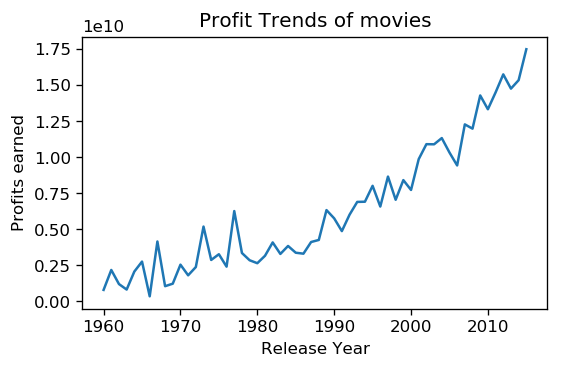

Maximum profitable year 2015
Minimum profitable year 1966


In [20]:
maxval,minval,plt=find_trend('release_year','profit')
#x-axis label
plt.xlabel('Release Year', fontsize = 10)
#y-axis label
plt.ylabel('Profits earned', fontsize = 10)
#title of the graph
plt.title('Profit Trends of movies')
plt.show()
print('Maximum profitable year',maxval)
print('Minimum profitable year',minval)

### Research Question 2  Movies with Popular runtime over the time
#### Observations:
maximum runtime was in year 2011 and minimum runtime was in year 1969. runtime is consistently increasing over years till 2014 and after that there is a steady decline in runtime

Labeling the graph : x-axis,y-axis and Title . calling function find_trend with parameters release_year and runtime to show graph and max/min values for runtime over the years

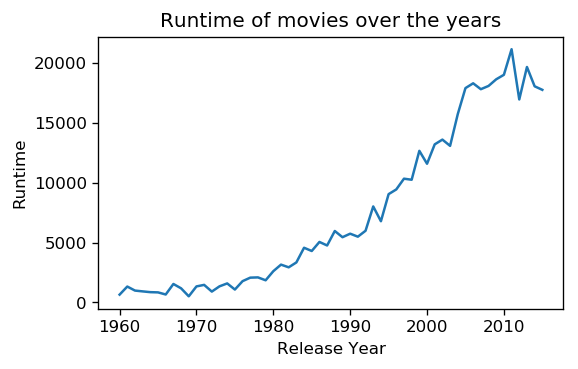

Maximum runtime year 2011
Minimum runtime year 1969


In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
maxval,minval,plt=find_trend('release_year','runtime')
#x-axis label
plt.xlabel('Release Year', fontsize = 10)
#y-axis label
plt.ylabel('Runtime', fontsize = 10)
#title of the graph
plt.title('Runtime of movies over the years')
plt.show()
print('Maximum runtime year',maxval)
print('Minimum runtime year',minval)


### Research Question 3 Popularity Trend of movies
#### Observations :
Movies were most popular in year 2015 and least popular in year 1966. Popularity of movies is consistently increasing over years

Labeling the graph : x-axis,y-axis and Title . calling function find_trend with parameters release_year and popularity to show graph and max/min values for popularity over the years

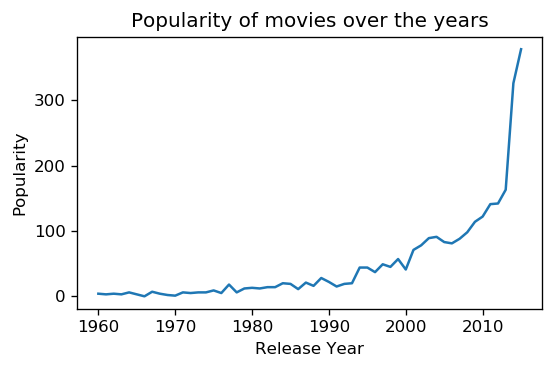

Most Popular year for movies 2015
Least Popular year for movies 1966


In [22]:

maxval,minval,plt=find_trend('release_year','popularity')
#x-axis label
plt.xlabel('Release Year', fontsize = 10)
#y-axis label
plt.ylabel('Popularity', fontsize = 10)
#title of the graph
plt.title('Popularity of movies over the years')
plt.show()
print('Most Popular year for movies',maxval)
print('Least Popular year for movies',minval)

### Research Question 4 Budget,Revenue and profit Distribution
#### Observations:
There are very few high budget movies. Revenue and profit are proportional. There is no direct relation between budget and revenue. some of the low budget movies have shown more profit than revenue. This may be due to inaccurate data.

Loading clean dataset which was created from original dataset

In [ ]:
df = pd.read_csv('clean_tmdb_data.csv')


Setting figure size


In [ ]:
figure = plt.figure(figsize=(10,6),dpi=120)

<matplotlib.figure.Figure at 0x10c980048>
Plotting histogram for budget_adj,revenue_adj and profit using different colors to differentiate them. Assigning labels to colors

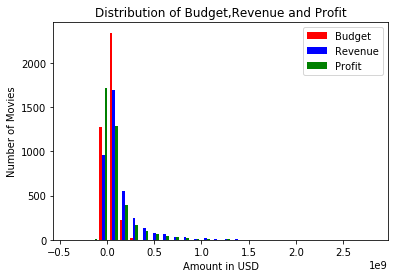

In [23]:
plt.hist([
        df['budget_adj'],df['revenue_adj'],df['profit']
        ], 
         stacked=False, color = ['r','b','g'],
         bins = 30,label = ['Budget','Revenue', 'Profit'])
###Labeling the graph : x-axis,y-axis and Title
plt.xlabel('Amount in USD')
plt.ylabel('Number of Movies')
plt.title('Distribution of Budget,Revenue and Profit')
### Adding legend 
plt.legend()

<a id='conclusions'></a>
## Conclusions

In this Investigation we are able to find most profitable and least profitable years.Also about maximu/minimum runtime and most/least popular year for movies.

Some of the other information we can find is average profits are increasing in last few years and runtime is decresing from past few years. However to determine relation between increase in profits and decrease in runtime over years need to be analysed further.Also popularity for movies is consistenly increasing. This may be due to increase in modes of advertisement and internet connectivity to more people.

There are some limitations. Above observations may not be accurate, as statistical methods are not used to infer information and only basic visualizations are used. Further analysis is required to produce accurate information. some rows are deleted from data set due to non existent values , this may effect the analysis and USD is considered as common currency for columns reveneu_adj and budget_adj. This may effect the profit trend of movies over the years..

## Submitting your Project 


In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0